In [1]:
import numpy as np
import lmfit
from scipy.signal import find_peaks_cwt
%matplotlib inline
import matplotlib.pyplot as plt
import ambigauss
import corner

[[Variables]]
    peak_0_center:   0.96234450 +/- 0.035355 (3.67%) (init= 0.9647748)
    peak_0_height:   0.98078134 +/- 0.060522 (6.17%) (init= 0.9811172)
    peak_0_width:    0.51372310 +/- 0.038222 (7.44%) (init= 0.5120412)
    peak_1_center:   2.99954279 +/- 0.004057 (0.14%) (init= 2.999506)
    peak_1_height:   6.11084470 +/- 0.073721 (1.21%) (init= 6.114639)
    peak_1_width:    0.29265268 +/- 0.004094 (1.40%) (init= 0.2926668)
    peak_2_center:   4.97113366 +/- 0.013938 (0.28%) (init= 4.971244)
    peak_2_height:   1.87423183 +/- 0.074252 (3.96%) (init= 1.868991)
    peak_2_width:    0.31552526 +/- 0.013142 (4.17%) (init= 0.31495)
    peak_3_center:   8.00517367 +/- 0.006419 (0.08%) (init= 8.005345)
    peak_3_height:   3.97924955 +/- 0.076910 (1.93%) (init= 3.974909)
    peak_3_width:    0.29421082 +/- 0.006157 (2.09%) (init= 0.2941979)
    noise:           0.29547338 +/- 0.010493 (3.55%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(peak_0_height, pe

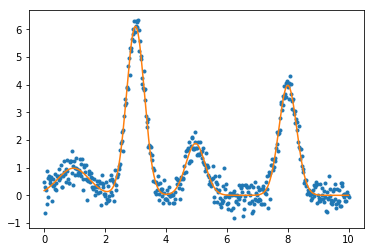

In [2]:
# Simulate noisy 4-peak spectrum
xdata = np.linspace(0, 10, 500)
ydata = ambigauss.gaussian(xdata, 1, 1, .5) + \
        ambigauss.gaussian(xdata, 2, 5, .3) + \
        ambigauss.gaussian(xdata, 6, 3, .3) + \
        ambigauss.gaussian(xdata, 4, 8, .3) + \
        np.random.randn(len(xdata))*.3 # Add noise


# Call fit function.
r = ambigauss.bayes_fit(xdata, ydata, burn=100, steps=5000, thin=20)

# Plot fitter results
xmodel = np.linspace(0,10, 1000)
ymodel = ambigauss.multigaussian(xmodel, r.params)

plt.plot(xdata, ydata , '.')
plt.plot(xmodel, ymodel, '-')
lmfit.report_fit(r.params)

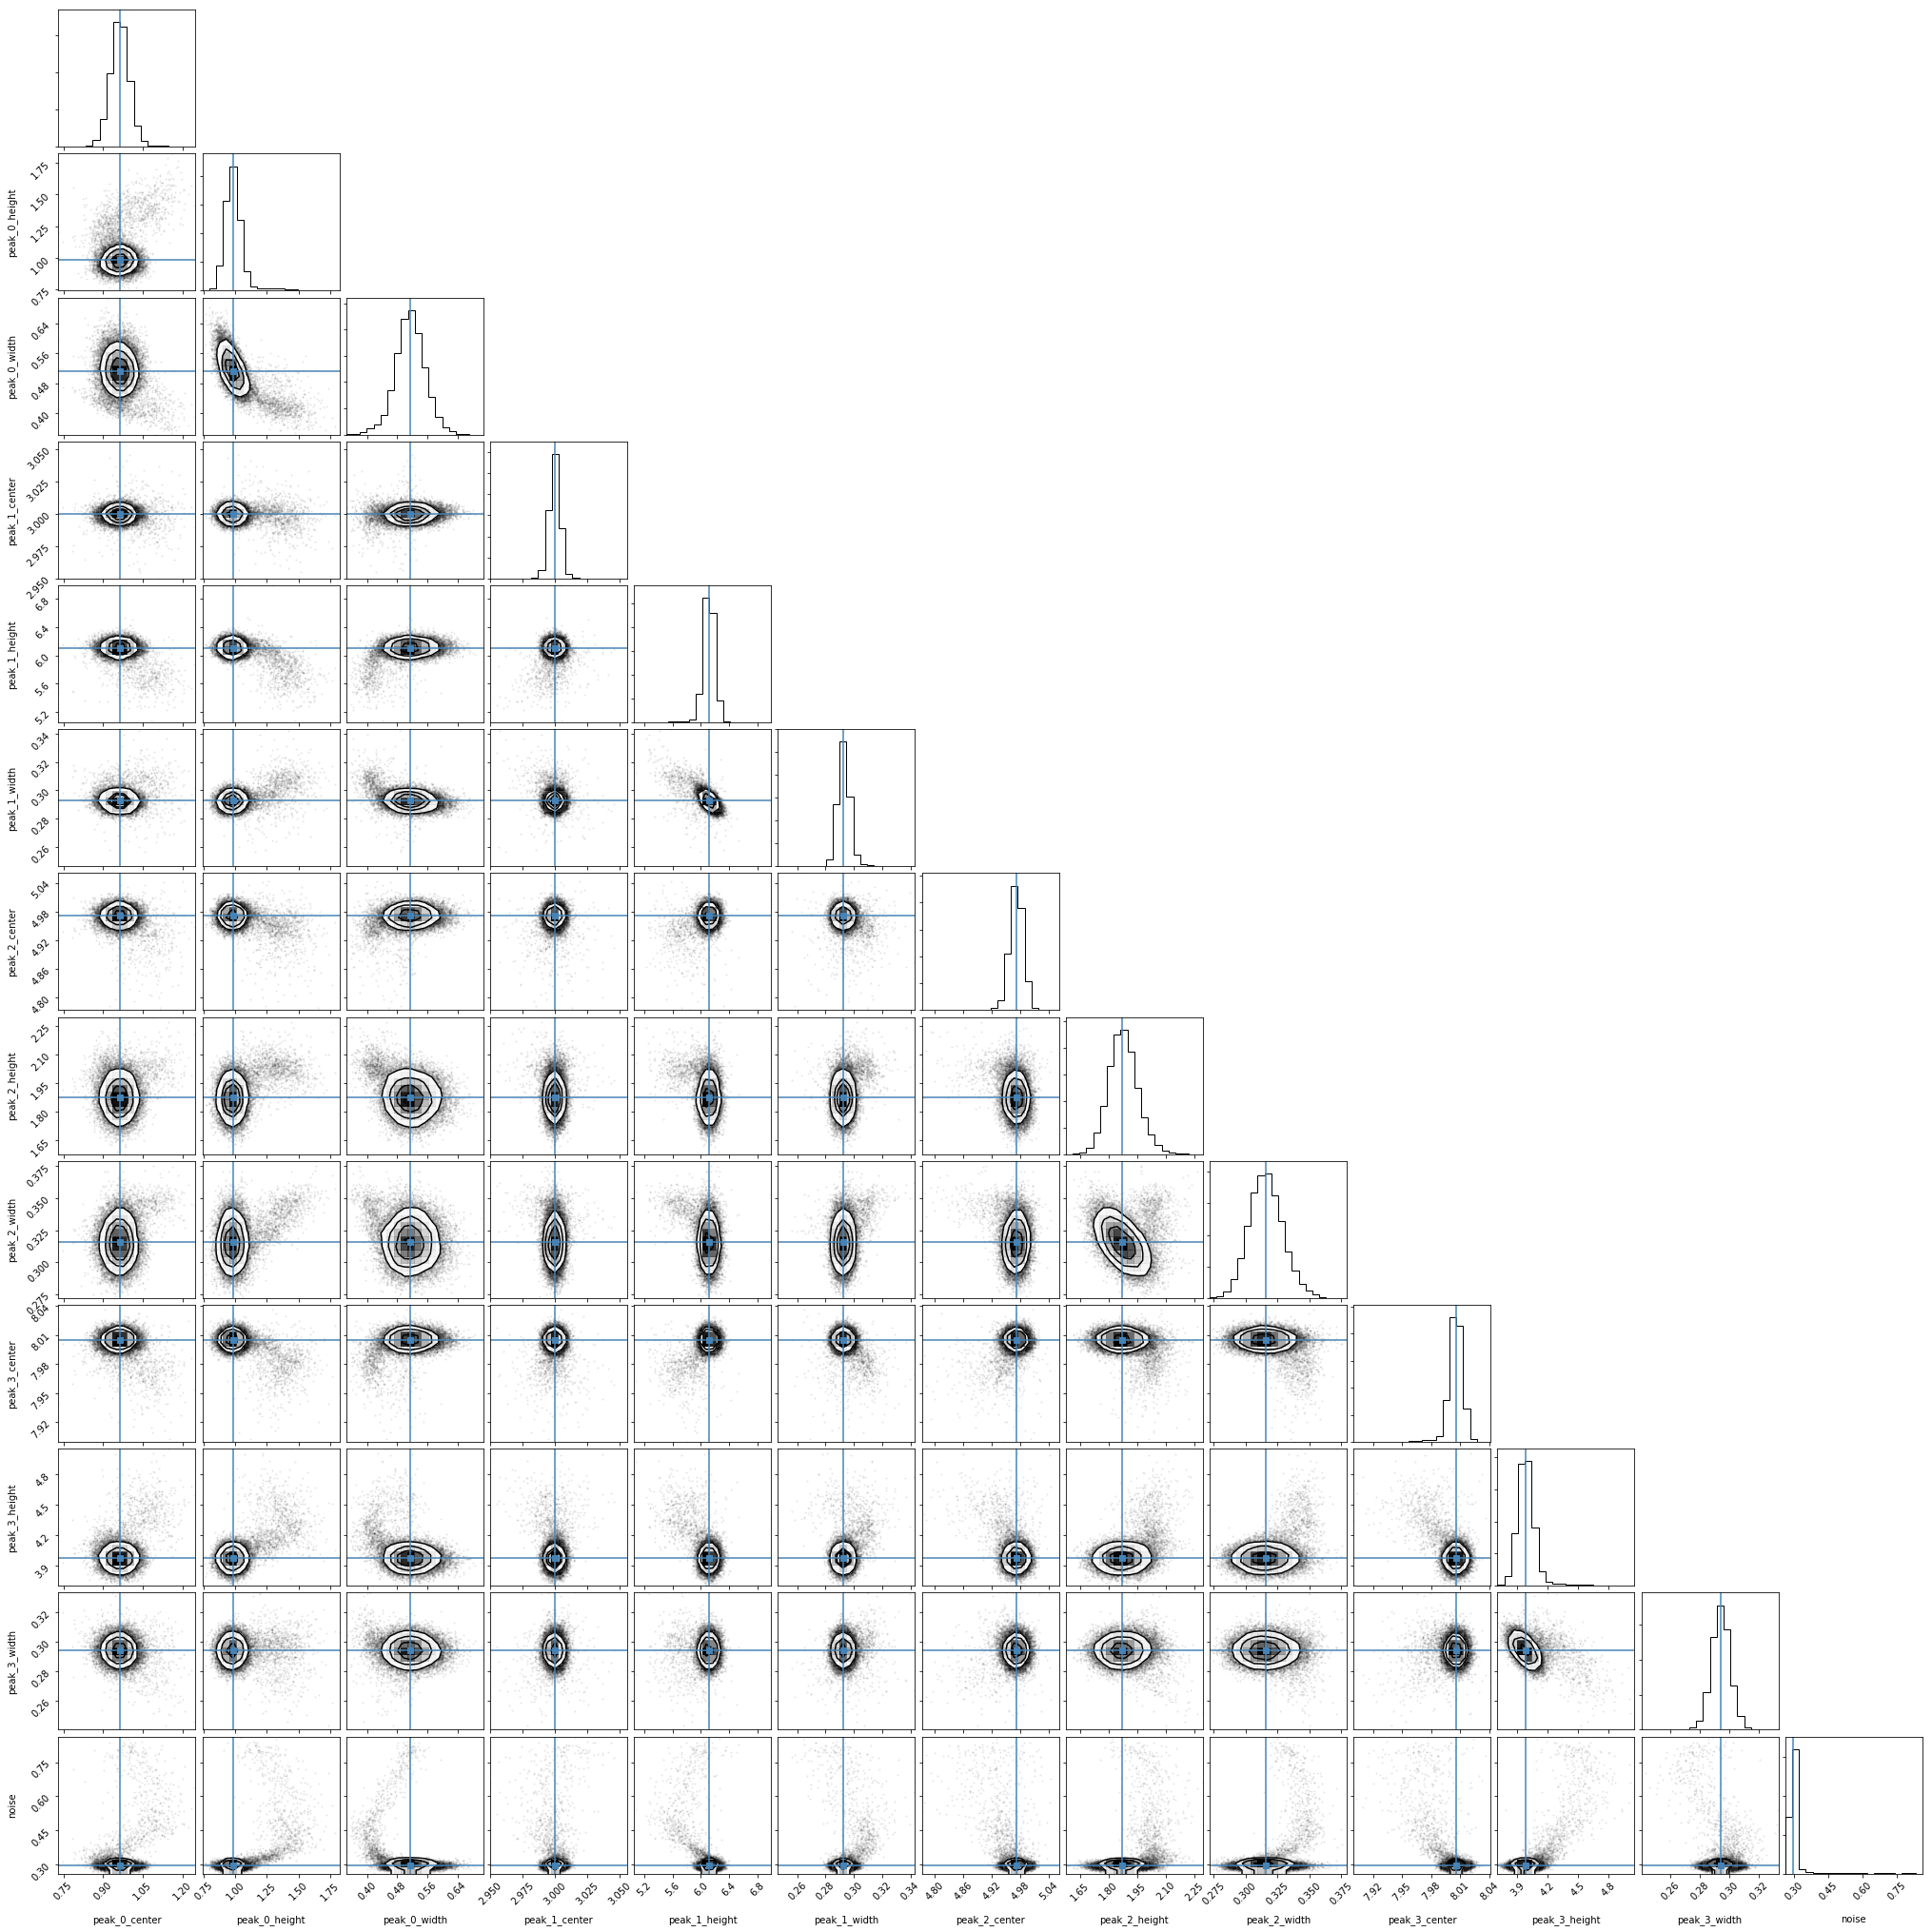

In [3]:
crnr = corner.corner(r.flatchain, labels=r.var_names, truths=list(r.params.valuesdict().values()))